In [1]:
# DNN(작은 의미의 딥러닝) 실습

In [2]:
import tensorflow

In [3]:
mnist = tensorflow.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
import numpy as np

In [7]:
# numpy float 출력 옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x:f"{x:0.3f}"})

In [8]:
np.set_printoptions(linewidth=1000)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [10]:
import matplotlib.pyplot as plt

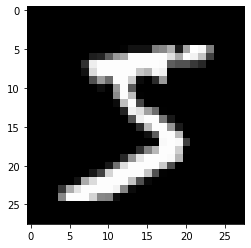

In [11]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [12]:
# 정규화, 표준화, 축소
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # 28*28 이미지를 1차원으로 변형, 1차원 : 784
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # overfitting을 막기 위해 Dropout 20% 적용
model.add(Dense(10, activation='softmax'))  # 10 : 0~9 중에 하나를 맞춘다. (0~9) 각각의 확률을 0.0~1.0 사이로 리턴

In [15]:
model.summary() # 요약 정보

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 모델 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# 훈련
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 959us/step - loss: 0.2945 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1438 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.1091 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 2s 886us/step - loss: 0.0876 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 2s 905us/step - loss: 0.0757 - accuracy: 0.9765


In [18]:
# 점수
model.evaluate(x_test, y_test)
# [0.07370293885469437, 0.9771000146865845] ==> [비용 정확도]

313/313 [==============================] - 0s 650us/step - loss: 0.0737 - accuracy: 0.9771


[0.07370293885469437, 0.9771000146865845]

In [19]:
# CNN 실습

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import tensorflow

In [24]:
mnist = tensorflow.keras.datasets.mnist

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D

In [28]:
x_train.shape  # 3차원

(60000, 28, 28)

In [30]:
# 3차원 ==> 4차원 으로 변형
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # 1은 흑백, 3은 칼라

In [31]:
x_train.shape

(60000, 28, 28, 1)

In [32]:
x_test.shape

(10000, 28, 28)

In [33]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [34]:
x_test.shape

(10000, 28, 28, 1)

In [35]:
# 정규화
x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255

In [37]:
# 모델 설계
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1))) # 1층만 input_shape
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D())  # 이미지 크기 : 14 X 14
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D())  # 이미지 크기 : 7 X 7
model.add(Flatten())  # 3차원 ==> 1차원
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 마지막 층, softmax를 쓰면 각각의 확률이 출력됨!

In [38]:
# 모델 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
%%time
# Wall time: 7min 31s
# 훈련
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=256)

Epoch 1/3
235/235 [==============================] - 151s 643ms/step - loss: 0.3027 - accuracy: 0.9052 - val_loss: 0.0443 - val_accuracy: 0.9860
Epoch 2/3
235/235 [==============================] - 153s 651ms/step - loss: 0.0708 - accuracy: 0.9815 - val_loss: 0.0309 - val_accuracy: 0.9905
Epoch 3/3
235/235 [==============================] - 145s 618ms/step - loss: 0.0493 - accuracy: 0.9862 - val_loss: 0.0231 - val_accuracy: 0.9924
Wall time: 7min 31s


In [41]:
# model.get_weights()

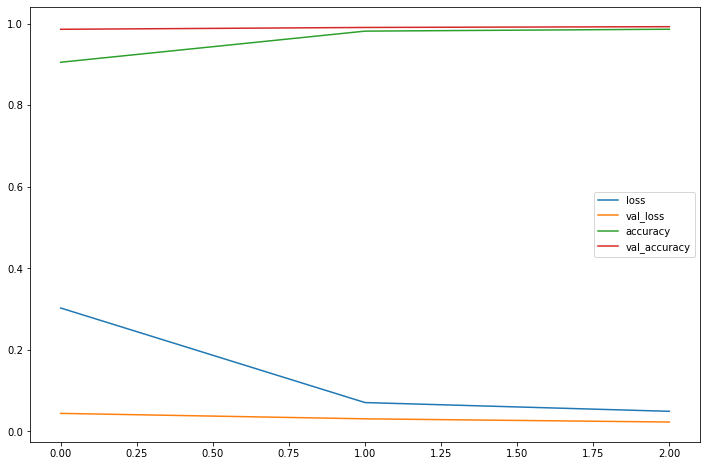

In [44]:
# 시각화
plt.figure(figsize=(12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()

In [45]:
# RNN( LSTM ) 실습 : 비트 코인 가격 예측

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [48]:
df = pd.read_csv("data/bit01.csv")
df

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,0.003428,1424304000,244.000000,225.000000,225.000000,0.193117,4.627631e+01,239.627778
1,0.003231,1424390400,245.000000,240.250000,240.250118,0.230429,5.589490e+01,242.568479
2,0.003480,1424476800,245.000000,245.000000,245.000000,0.060091,1.472224e+01,245.000000
3,0.002955,1424563200,249.000000,235.000000,245.000000,0.539055,1.291212e+02,239.532608
4,0.002955,1424649600,235.001000,235.000000,235.000002,0.410926,9.656756e+01,235.000062
...,...,...,...,...,...,...,...,...
1139,0.379828,1522713600,7505.450000,7005.427096,7047.405427,2699.015224,1.981152e+07,7340.278123
1140,0.346100,1522800000,7414.666938,6684.316503,7406.145999,3178.492068,2.234900e+07,7031.322714
1141,0.346365,1522886400,6910.000000,6542.313932,6777.912878,2738.734808,1.849236e+07,6752.154445
1142,0.337888,1522972800,6847.592164,6499.982992,6775.000000,1976.904608,1.306531e+07,6608.971509


In [49]:
price = df['close']
price

0       0.003428
1       0.003231
2       0.003480
3       0.002955
4       0.002955
          ...   
1139    0.379828
1140    0.346100
1141    0.346365
1142    0.337888
1143    0.350881
Name: close, Length: 1144, dtype: float64

In [50]:
window_size = 5
X = []
y = []
for i in range(len(price) - window_size):  # 1144 - 5 ==> 1139
    X.append(price.iloc[i:i+window_size]) # 0:5 => [0,1,2,3,4]
    y.append(price.iloc[i+window_size])   # 5   => [5]

In [51]:
X = np.array(X)
y = np.array(y)

In [52]:
X.shape

(1139, 5)

In [53]:
X[0]

array([0.00342784, 0.00323093, 0.00348035, 0.00295525, 0.00295525])

In [54]:
y.shape

(1139,)

In [55]:
y[0]

0.0032046727572156

In [56]:
# 훈련 데이터와 테스트 데이터로 분리
split_val = 1000
X_train = X[:split_val, :] # 행 0:1000, 열 전체
y_train = y[:split_val]    # 0:1000 ==> 0~999
X_test = X[split_val:, :]  # 행 1000:끝까지, 열 전체
y_test = y[split_val:]     # 1000부터 끝까지

In [57]:
# X_train 을 변형 : (1000, 5) ==> (1000, 5, 1)
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_train.shape
# 총 갯수(행의 수), 열의 수, 정답 y의 차원 : 1

(1000, 5, 1)

In [58]:
X_test.shape

(139, 5)

In [59]:
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1)) # (139, 5) ==> (139, 5, 1)
X_test.shape

(139, 5, 1)

In [60]:
### 전처리 끝 : 훈련 데이터와 테스트 데이터 준비 완료

In [62]:
model = Sequential()
model.add(LSTM(128, input_shape=(5, 1))) # 5개의 X를 가지고 1개의 y를 맞춘다.
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [63]:
%%time
model.fit(X_train, y_train, epochs=3, batch_size=1)

Epoch 1/3
1000/1000 [==============================] - 2s 2ms/step - loss: 4.4714e-04
Epoch 2/3
1000/1000 [==============================] - 2s 2ms/step - loss: 2.4099e-04
Epoch 3/3
1000/1000 [==============================] - 2s 2ms/step - loss: 2.5054e-04
Wall time: 6.45 s


In [64]:
train_predict = model.predict(X_train)

In [65]:
test_predict = model.predict(X_test)

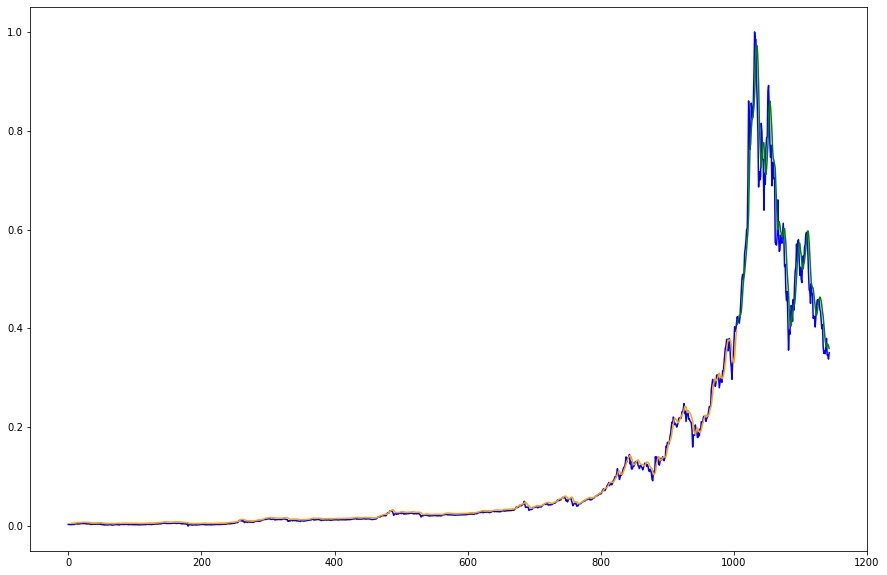

In [68]:
# 시각화
plt.figure(figsize=(15, 10))
plt.plot(price, color='blue')
split_pt = split_val + window_size  # 1000 + 5 ==> 1005
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='orange')
plt.plot(np.arange(split_pt, split_pt+len(test_predict), 1), test_predict, color='green')
plt.show()

In [69]:
# end